In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

data_dir = 'C:/Users/John Lang/Documents/Data Science Machine Learning/Data Science/Tensorflow2.0_Keras/CNN/cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

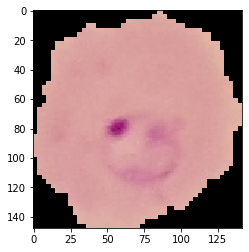

In [10]:
para_img= imread(para_cell)
plt.imshow(para_img)

In [14]:
uninfected_cell = train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0]

In [15]:
uninfected_cell

'C:/Users/John Lang/Documents/Data Science Machine Learning/Data Science/Tensorflow2.0_Keras/CNN/cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

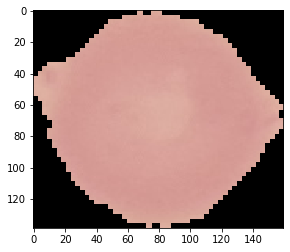

In [16]:
uninf_img= imread(uninfected_cell)
plt.imshow(uninf_img)

In [18]:
len(os.listdir(train_path+'parasitized'))

12480

In [19]:
len(os.listdir(train_path+'uninfected'))

12480

In [20]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

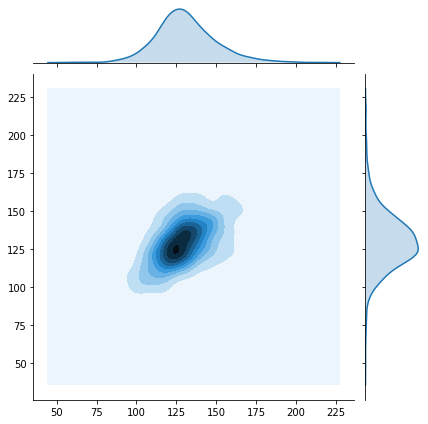

In [23]:
sns.jointplot(dim1,dim2, kind='kde')

In [24]:
np.mean(dim1)

130.92538461538462

In [25]:
np.mean(dim2)

130.75

In [26]:
image_shape = (130,130,3)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# help(ImageDataGenerator)

In [30]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range = 0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

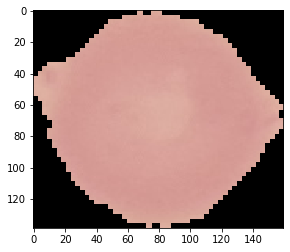

In [32]:
plt.imshow(uninf_img)

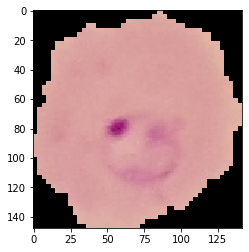

In [35]:
para_cell = imread(para_cell)
plt.imshow(para_cell)

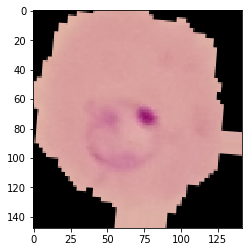

In [39]:
plt.imshow(image_gen.random_transform(para_img))

In [40]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [44]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape,
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [46]:
batch_size=16

In [49]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [51]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [52]:
results = model.fit_generatoclassification_report, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 185s 119ms/step - loss: 0.8896 - accuracy: 0.5399 - val_loss: 0.6857 - val_accuracy: 0.5550
Epoch 2/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6805 - accuracy: 0.5715 - val_loss: 0.6736 - val_accuracy: 0.5962
Epoch 3/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6748 - accuracy: 0.5850 - val_loss: 0.6731 - val_accuracy: 0.5885
Epoch 4/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6700 - accuracy: 0.5977 - val_loss: 0.6684 - val_accuracy: 0.6031
Epoch 5/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6694 - accuracy: 0.6047 - val_loss: 0.6686 - val_accuracy: 0.6069
Epoch 6/20
1560/1560 [==============================] - 171s 109ms/step - loss: 0.6624 - 

In [53]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [60]:
predictions = pred > 0.5

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1300
           1       0.92      0.93      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.92      2600
weighted avg       0.93      0.93      0.92      2600



In [62]:
sns.heatmap(classification_report(test_image_gen.classes, predictions))

ValueError: Must pass 2-d input

In [63]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1192,  108],
       [  87, 1213]], dtype=int64)

In [64]:
from tensorflow.keras.preprocessing import image
my_image = type(image.load_img(para_cell, target_size=image_shape))
my_image

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
model.summary

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
np.expand_dims(image.img_to_array(my_img), axis=0)